In [1]:
import pandas as pd
import numpy as np
import env

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so


from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation

import env
import acquire
import prepare
import explore

In [2]:
#Sets options to show more information
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200

1. Clustering with the Iris Dataset. Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [3]:
iris_df = acquire.wrangle_iris()

In [4]:
iris_df.drop(columns='species_id', inplace=True)

In [5]:
i_train, i_val, i_test = prepare.train_validate(iris_df)

In [6]:
i_train.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
120,121,6.9,3.2,5.7,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
106,107,4.9,2.5,4.5,1.7,virginica
5,6,5.4,3.9,1.7,0.4,setosa
53,54,5.5,2.3,4.0,1.3,versicolor


In [7]:
cont_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [8]:
i_train_scaled, i_val_scaled, i_test_scaled = prepare.scale_zillow(i_train, i_val, i_test, cont_columns)

In [9]:
X = i_train_scaled[['sepal_width', 'petal_width']]

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X[['sepal_width', 'petal_width']])

X['cluster_preds'] = kmeans.predict(X[['sepal_width', 'petal_width']])

In [11]:
X['cluster_preds'].head()

120    0
146    2
106    2
5      1
53     2
Name: cluster_preds, dtype: int32

In [12]:
cluster_df = pd.DataFrame(kmeans.cluster_centers_, columns = ['sepal_width', 'petal_width'])
cluster_df.rename_axis(index='centroid')

,sepal_width,petal_width
centroid,,
0,0.524510,0.818627
1,0.655556,0.063889
2,0.279570,0.537634


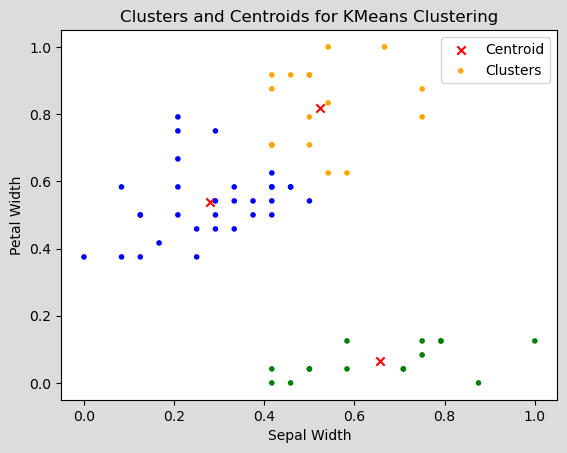

In [13]:
#Colors for the clusters
colors = {0:'orange', 1:'green', 2:'blue'}

#Plotting
fig, ax = plt.subplots(facecolor='gainsboro', edgecolor='dimgray')
ax.scatter(cluster_df['sepal_width'], cluster_df['petal_width'], marker='x', color = 'red', label='Centroid')
ax.scatter(X['sepal_width'], X['petal_width'], marker = '.', c=X['cluster_preds'].map(colors), label='Clusters')
ax.set_ylabel('Petal Width')
ax.set_xlabel('Sepal Width')
ax.set_title("Clusters and Centroids for KMeans Clustering")
ax.legend()
plt.show()

In [14]:
cluster_df

,sepal_width,petal_width
0,0.524510,0.818627
1,0.655556,0.063889
2,0.279570,0.537634


In [15]:
inertia = []

for n in range(1,11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X[['sepal_width', 'petal_width']])

    X['cluster_preds'] = kmeans.predict(X[['sepal_width', 'petal_width']])
    
    inertia.append({'n_clusters': n,
                    'inertia': kmeans.inertia_})

In [16]:
inertia = pd.DataFrame(inertia)

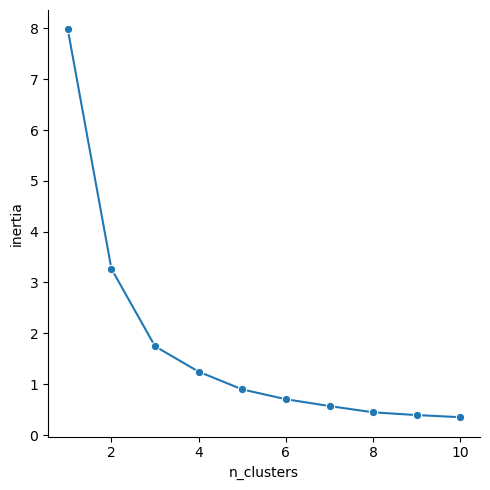

In [17]:
sns.relplot(data=inertia, x='n_clusters', y='inertia', kind='line', marker='o')

In [18]:
X = i_train_scaled[['sepal_width', 'sepal_length','petal_width', 'petal_length']]

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X[['sepal_width', 'sepal_length','petal_width', 'petal_length']])

X['cluster_preds'] = kmeans.predict(X[['sepal_width', 'sepal_length','petal_width', 'petal_length']])

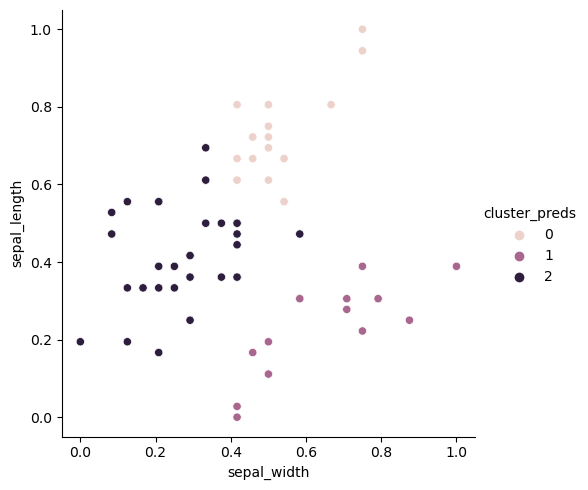

In [20]:
sns.relplot(data=X, x='sepal_width', y='sepal_length', hue='cluster_preds')

In [21]:
inertia = []

for n in range(1,11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X[['sepal_width', 'sepal_length','petal_width', 'petal_length']])

    X['cluster_preds'] = kmeans.predict(X[['sepal_width', 'sepal_length','petal_width', 'petal_length']])
    
    inertia.append({'n_clusters': n,
                    'inertia': kmeans.inertia_})

In [22]:
inertia = pd.DataFrame(inertia)

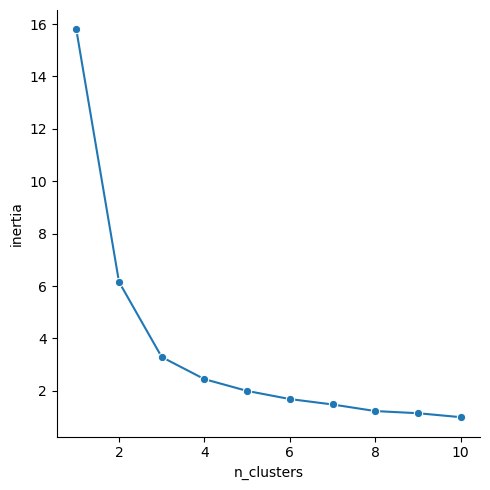

In [23]:
sns.relplot(data=inertia, x='n_clusters', y='inertia', kind='line', marker='o')

In [24]:
pd.DataFrame(kmeans.cluster_centers_).head

<bound method NDFrame.head of           0         1         2         3
0  0.308333  0.466667  0.741667  0.689286
1  0.754167  0.305556  0.083333  0.085714
2  0.440476  0.722222  0.613095  0.732143
3  0.125000  0.319444  0.402778  0.461310
4  0.722222  0.916667  0.888889  0.946429
5  0.484375  0.656250  0.895833  0.796875
6  0.458333  0.100000  0.025000  0.042857
7  0.291667  0.322917  0.515625  0.531250
8  0.427083  0.493056  0.567708  0.618304
9  0.138889  0.546296  0.555556  0.625000>

<AxesSubplot:>

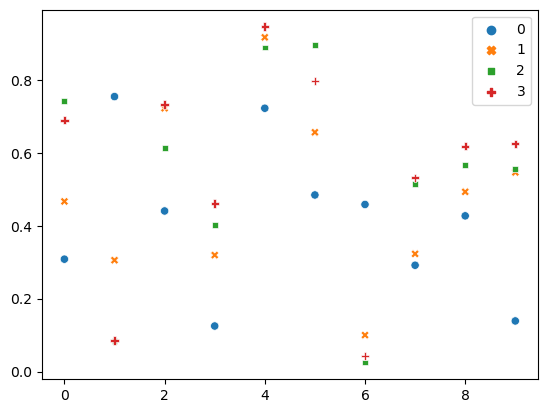

In [25]:
sns.scatterplot(data=pd.DataFrame(kmeans.cluster_centers_))

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [26]:
mall_df = acquire.wrangle_mall()

In [27]:
m_train, m_val, m_test = prepare.train_validate(mall_df)

In [28]:
m_train.head()

,customer_id,gender,age,annual_income,spending_score
109,110,Male,66,63,48
135,136,Female,29,73,88
5,6,Female,22,17,76
127,128,Male,40,71,95
170,171,Male,40,87,13


In [29]:
cont_columns = ['age', 'annual_income', 'spending_score']

In [30]:
m_train_scaled, m_val_scaled, m_test_scaled = prepare.scale_zillow(m_train, m_val, m_test, cont_columns)

In [31]:
X = m_train_scaled[['annual_income', 'spending_score']]

In [32]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X[['annual_income', 'spending_score']])

X['cluster_preds'] = kmeans.predict(X[['annual_income', 'spending_score']])

In [33]:
cluster_df = pd.DataFrame(kmeans.cluster_centers_, columns = ['annual_income', 'spending_score'])
cluster_df.rename_axis(index='centroid')

,annual_income,spending_score
centroid,,
0,0.749332,0.825448
1,0.141529,0.191700
2,0.779040,0.201691
3,0.455114,0.503533
4,0.108766,0.813665


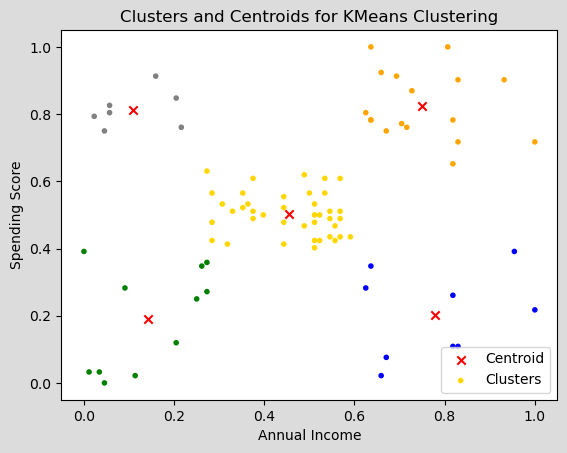

In [34]:
#Colors for the clusters
colors = {0:'orange', 1:'green', 2:'blue', 3:'gold', 4:'gray'}


fig, ax = plt.subplots(facecolor='gainsboro', edgecolor='dimgray')
ax.scatter(cluster_df['annual_income'], cluster_df['spending_score'], marker='x', color = 'red', label='Centroid')
ax.scatter(X['annual_income'], X['spending_score'], marker = '.', c=X['cluster_preds'].map(colors), label='Clusters')
ax.set_ylabel('Spending Score')
ax.set_xlabel('Annual Income')
ax.set_title("Clusters and Centroids for KMeans Clustering")
ax.legend()
plt.show()

In [35]:
inertia0 = []

for n in range(1,11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X[['annual_income', 'spending_score']])

    X['cluster_preds'] = kmeans.predict(X[['annual_income', 'spending_score']])
    
    inertia0.append({'n_clusters': n,
                    'inertia': kmeans.inertia_})

In [36]:
inertia0 = pd.DataFrame(inertia)

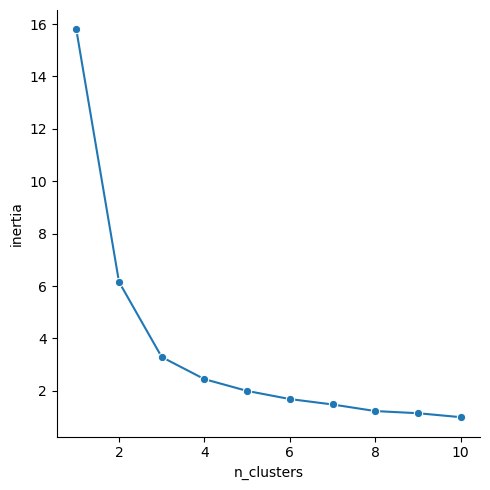

In [37]:
sns.relplot(data=inertia0, x='n_clusters', y='inertia', kind='line', marker='o')

Second Group:

In [38]:
X = m_train_scaled[['age', 'spending_score']]

In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X[['age', 'spending_score']])

X['cluster_preds'] = kmeans.predict(X[['age', 'spending_score']])

In [40]:
cluster_df = pd.DataFrame(kmeans.cluster_centers_, columns = ['age', 'spending_score'])
cluster_df.rename_axis(index='centroid')

,age,spending_score
centroid,,
0,0.189600,0.356957
1,0.750625,0.415082
2,0.236296,0.799517


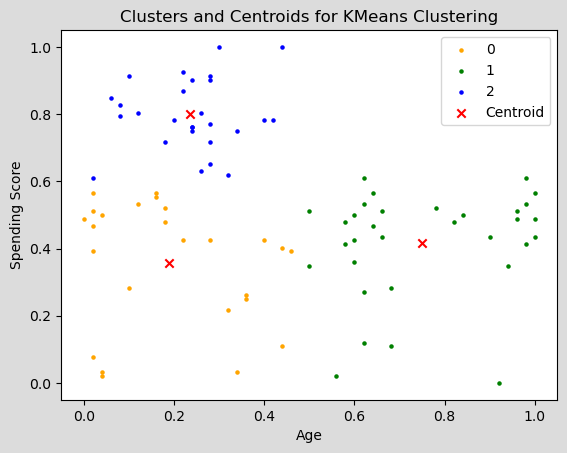

In [41]:
#Playing with another way to plot the data. Better legend.

fig, ax = plt.subplots(facecolor='gainsboro', edgecolor='dimgray')

colors = {0:'orange', 1:'green', 2:'blue', 3:'gold', 4:'gray'}

grouped = X.groupby('cluster_preds')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='spending_score', marker='.', label=key, color=colors[key])
ax.scatter(cluster_df['age'], cluster_df['spending_score'], marker='x', color = 'red', label='Centroid')
ax.set_ylabel('Spending Score')
ax.set_xlabel('Age')
ax.set_title("Clusters and Centroids for KMeans Clustering")
ax.legend()
plt.show()

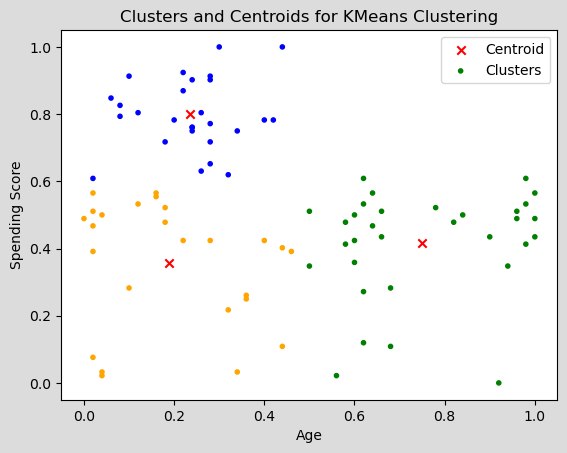

In [42]:
#Colors for the clusters
colors = {0:'orange', 1:'green', 2:'blue', 3:'gold', 4:'gray'}


fig, ax = plt.subplots(facecolor='gainsboro', edgecolor='dimgray')
ax.scatter(cluster_df['age'], cluster_df['spending_score'], marker='x', color = 'red', label='Centroid')
ax.scatter(X['age'], X['spending_score'], marker = '.', c=X['cluster_preds'].map(colors), label='Clusters')
ax.set_ylabel('Spending Score')
ax.set_xlabel('Age')
ax.set_title("Clusters and Centroids for KMeans Clustering")
ax.legend()
plt.show()

In [43]:
inertia0 = []

for n in range(1,11):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X[['age', 'spending_score']])

    X['cluster_preds'] = kmeans.predict(X[['age', 'spending_score']])
    
    inertia0.append({'n_clusters': n,
                    'inertia': kmeans.inertia_})

In [44]:
inertia0 = pd.DataFrame(inertia)

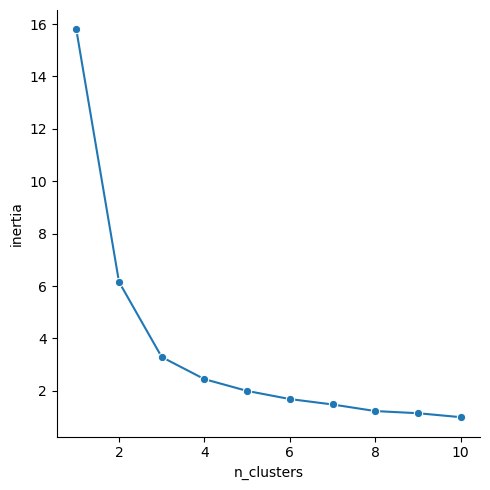

In [45]:
sns.relplot(data=inertia0, x='n_clusters', y='inertia', kind='line', marker='o')

3. How does scaling impact the results of clustering?
- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [46]:
X1 = m_train_scaled[['annual_income', 'spending_score']]

In [47]:
X2 = m_train[['annual_income', 'spending_score']]

In [48]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(X1[['annual_income', 'spending_score']])

X1['cluster_scaled_preds'] = kmeans1.predict(X1[['annual_income', 'spending_score']])

In [49]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X2[['annual_income', 'spending_score']])

X1['cluster_preds'] = kmeans2.predict(X2[['annual_income', 'spending_score']])

In [50]:
X1.head()

,annual_income,spending_score,cluster_scaled_preds,cluster_preds
109,0.545455,0.489130,0,0
135,0.659091,0.923913,2,2
5,0.022727,0.793478,1,1
127,0.636364,1.000000,2,2
170,0.818182,0.108696,0,0


In [51]:
#Randomly, these predictions have been the same or different with each notebook run.
X1[['cluster_scaled_preds', 'cluster_preds']].diff(axis=1).sum() #Output is 'cluster_preds' - 'cluster_scaled_preds' column.

cluster_scaled_preds    0.0
cluster_preds           0.0
dtype: float64

### Playing with a different clustering algorithum

In [52]:
af = AffinityPropagation(preference=-1)

In [53]:
clustering = af.fit(X1[['annual_income', 'spending_score']])

In [54]:
clustering.labels_

array([3, 1, 4, 1, 0, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 2, 1,
       0, 2, 3, 3, 1, 3, 1, 3, 0, 3, 1, 1, 3, 2, 3, 3, 3, 2, 1, 0, 1, 1,
       3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 4, 2, 4, 1, 3, 3, 3, 3, 4, 3, 4,
       0, 3, 4, 0, 3, 3, 3, 1, 1, 3, 3, 3, 2, 0, 3, 1, 3, 2])

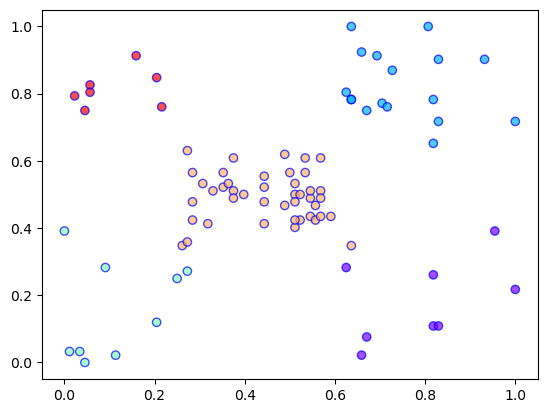

In [55]:
plt.scatter(X1['annual_income'], X['spending_score'], c=clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')